 # Modeling the swelling behavior of a hypromellulose-based pharmaceutical formulation


In [1]:
import numpy as np
from numpy import array
from diffusionpy import Diffusion_MS,D_Matrix,Diffusion_MS_iter,vpure,dlnai_dlnxi_loop,circular,origin_like
import matplotlib.pyplot as plt

We import the experimental data from https://doi.org/10.1016/s0168-3659(99)00104-2

In [2]:

swelling_data=array([[0.       ,    0.    ],
       [  9.24861,   0.895  ],
       [ 11.18739,   1.08754],
       [ 16.86526,   1.2824 ],
       [ 32.37552,   1.54222],
       [ 63.25758,   2.15696],
       [121.14411,   2.80418],
       [152.02616,   3.06168],
       [182.76973,   3.28902],
       [211.713  ,   3.51403],
       [242.59505,   3.8388 ],
       [271.53832,   4.00119],
       [302.42037,   4.25869],
       [333.30242,   4.38859],
       [360.3069 ,   4.61593],
       [420.13222,   5.06829],
       [451.01427,   5.13324],
       [483.83511,   5.35826]])

minutes_exp=swelling_data[:,0]
thickness_millis=swelling_data[:,1]
msol=500000
mges0=125
wv0=0.01
wv8=0.99

dl0vec=np.asarray([0.1,0.2,0.3,0.4,0.6,0.8])

def limits(dl0,wv0,wv8):
       wi0=np.asarray([(1-wv0)*(1-dl0),(1-wv0)*dl0,wv0])
       wi8=np.asarray([(1-wv8)*(1-dl0),(1-wv8)*dl0,wv8])
       return wi0,wi8


We wan to model this particular behavior

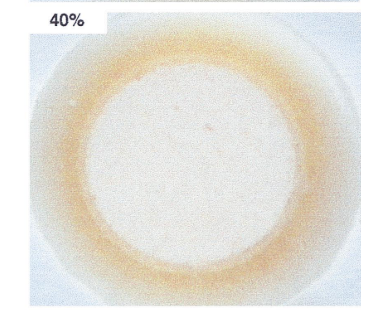

In [3]:
from IPython.display import Image
Image("swelling_hpmc.png")

 We want to describe the water sorption and dissolution of this formulation. The formulation consists of three components: the hypromellulose (hpmc) which is the polymer, the buflomedil pyridoxal phosphate (bpp) as an API and water. First we define starting and equilibrium weight fractions.

In [19]:
nc=3
L=6/1000
# Dvec=np.asarray([5E-11,6E-9,6E-9]) 

Dvec=np.asarray([0.5E-10,50E-10,4E-10]) 
# Dvec=np.asarray([0.5E-10,80E-10,30E-10])/50
# Dvec=np.asarray([0.5E-10,40E-10,30E-10])/20
# Dvec=np.asarray([10000E-10,500E-10,1000E-10])/800
Dvec=np.asarray([1E-10,1E-10,50E-10])*3
Dvec=np.asarray([1E-10,1E-10,1E-10])*6
# Dvec=np.asarray([0.5E-10,40E-10,30E-10])*10
# Dvec=np.asarray([4E-12,1.1E-10,1.1E-7])*3
# Mi=np.asarray([86000,554.5,18.015])
Mi=np.asarray([86000,554.5,18.015])
nt=300
t=np.linspace(0,minutes_exp[-1],nt)*60
mobile=np.asarray([False,True,True])

EJ=np.asarray([12E11])
etaJ=np.asarray([12E11])
exponent=np.asarray([0.,30.])

# Density of BPP  1394 kg/m3 at 37 C via Helium Pycnometry https://doi.org/10.1016/s0168-3659(99)00104-2
# Water solubility of BPP  0.65 kg/l  https://doi.org/10.1016/s0168-3659(99)00104-2



In [20]:
T=298.15
p=1E5
kij=D_Matrix(np.asarray([0,0,0]),nc)
par={"mi":np.asarray([4136.278, 14.283,1.20469]),
"si": np.asarray([2.889, 3.535,2.797059952]),
"ui" :np.asarray([298.047, 262.79,353.95]),
"eAi" :np.asarray([0., 886.4,2425.67]),
"kAi":np.asarray([0.02, 0.02,0.04509]),
"NAi":np.asarray([525., 3.,1.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([[0.]])}

vpures=vpure(p,T,**par)
par["vpure"]=vpures
dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi_loop(T,wi,**par)

In [21]:


# wt,wtz,zvec,Lt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,full_output=True,nz=20,dlnai_dlnwi_fun=dlnai_dlnwi_fun)
# wrel=-mges0/msol*(wt*Lt[:,None]/L-wi0)


 We can determine the mass dissolved in the dissolution medium by quantifying the mass that leaves the ASD. The initial mass of the ASD and the mass of the dissolution medium must be known

 We plot the results

In [22]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

# fig, ax = origin_like.subplots()
# origin_like.plot(ax,t/60,wrel[:,1], "g-")
# origin_like.set_xlabel(ax,"t","s")
# origin_like.set_ylabel(ax,"w_i","-")

And lastly

------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0707149 seconds ----------------
------------- Initialization and postprocessing took 0.0145645 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0398801 seconds ----------------
------------- Initialization and postprocessing took 0.0026754 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0446709 seconds ----------------
------------- Initialization and postprocessing took 0.0094793 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling too

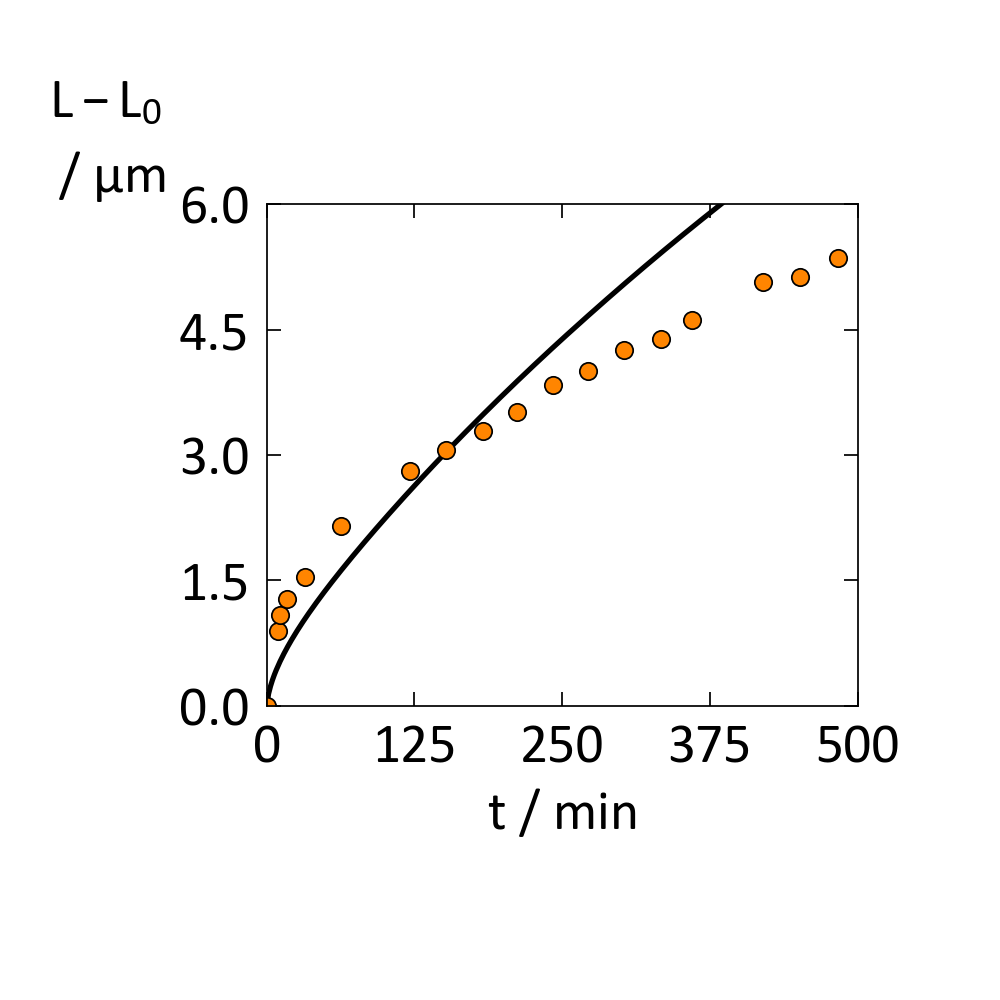

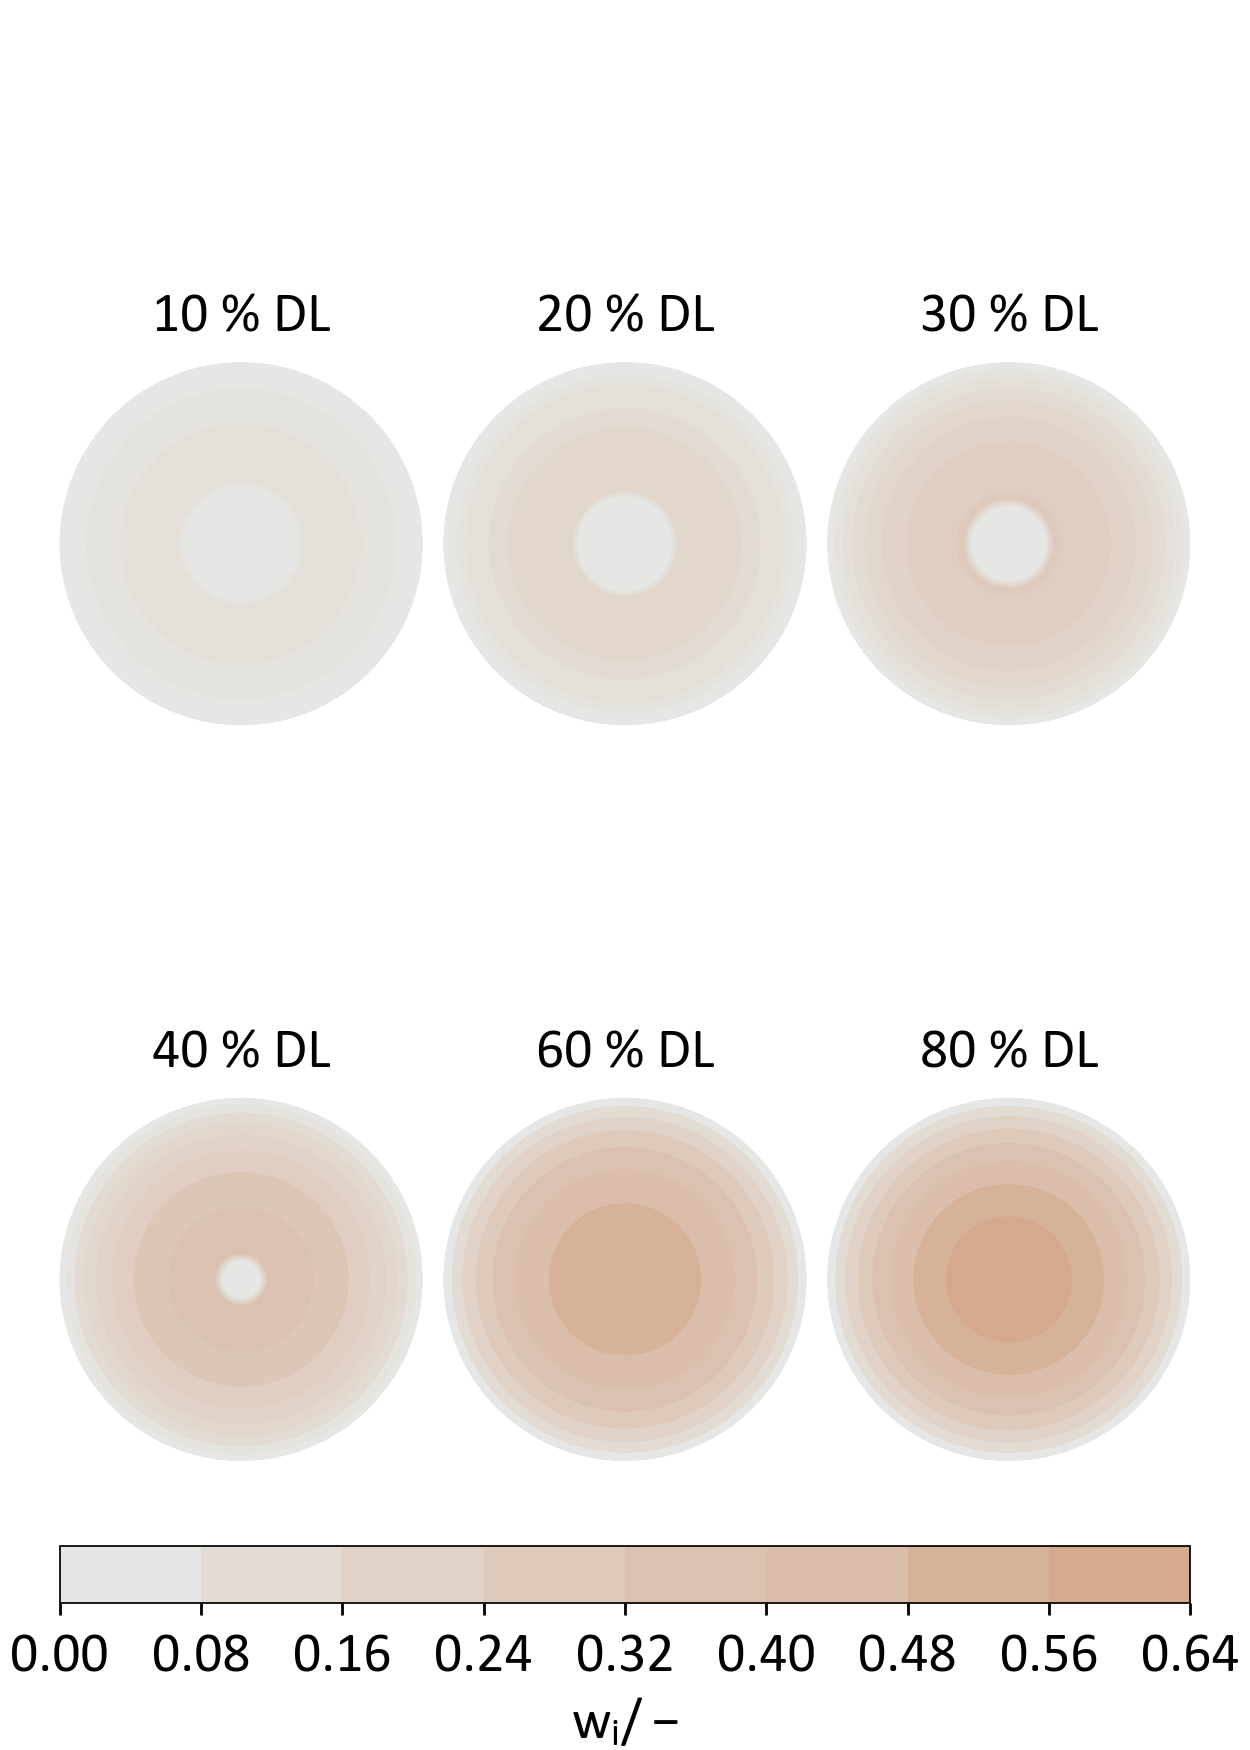

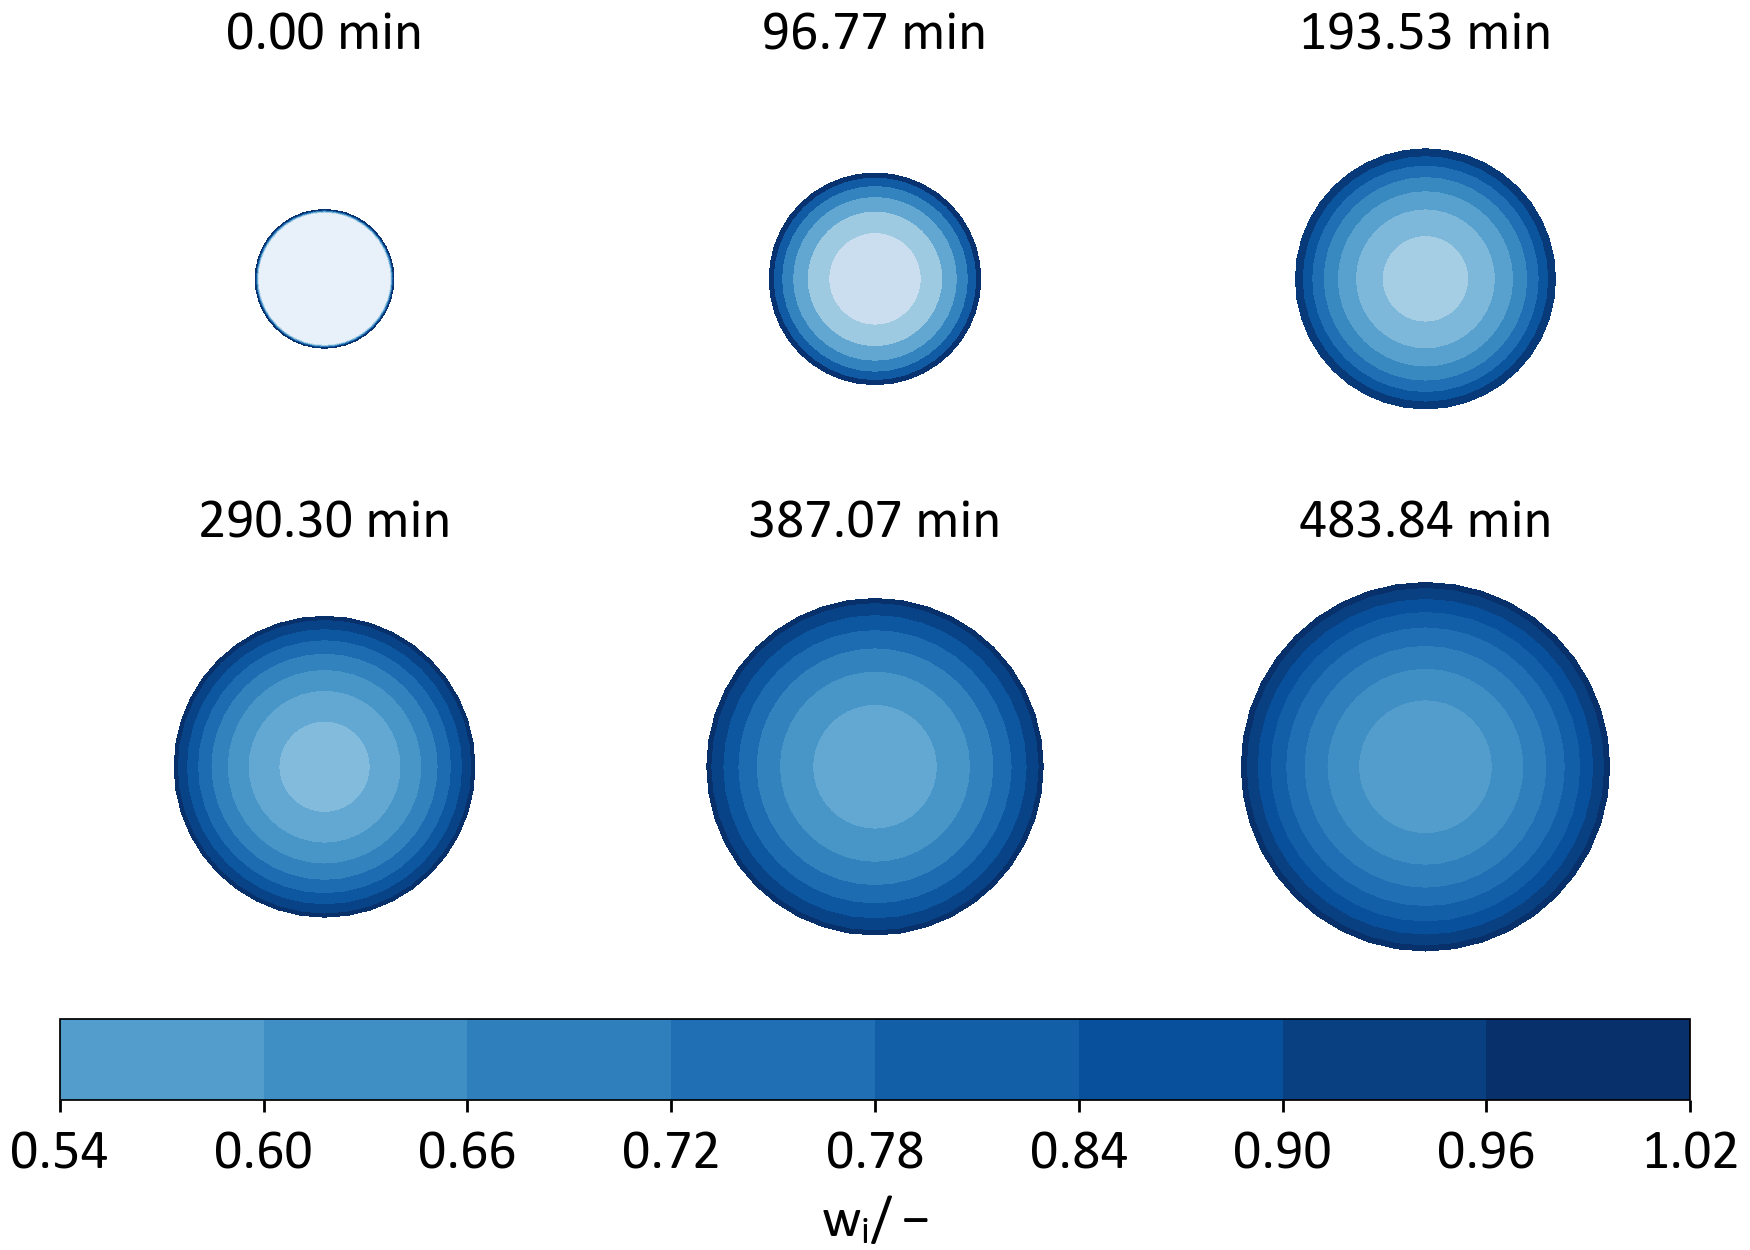

In [23]:
from matplotlib.colors import LinearSegmentedColormap

# colors = [(230/255, 231/255, 228/255), (228/255, 196/255, 166/255)] # first color is black, last is red
colors = [(230/255, 231/255, 228/255), (211/255, 164/255, 136/255)] 
colors = [(230/255, 231/255, 228/255), (207/255, 153/255, 118/255)] 
# colors = [(230/255, 231/255, 228/255), (221/255, 231/255, 243/255)] #
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)
import matplotlib
def circular2(zvec,wtz_list,comp=0,cmap="Blues",vmin=None,vmax=None,label=None,dlvec=None):
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.rm'] = 'Calibri'
    matplotlib.rcParams['mathtext.it'] = 'Calibri'
    matplotlib.rcParams['mathtext.bf'] = 'Calibri'
    matplotlib.rcParams['xtick.major.pad']='5'
    matplotlib.rcParams['ytick.major.pad']='5'
    matplotlib.rcParams['axes.linewidth'] = 0.5
    # matplotlib.rcParams["toolbar"] = "toolmanager"
    # plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    font = {'weight' : 'normal',
            'size'   : 16,
            'family' : "calibri"}
    plt.rc('font', **font)
    plt.rc('axes', titlesize=font["size"]) 
    L=zvec[-1]
    # expansion=Lt[:,None]/L if Lt is not None else np.ones_like(t)[:,None]
    phi=np.linspace(0,2*np.pi,41)
    Rad,Phi=np.meshgrid(zvec*1E6,phi)
    instances=len(wtz_list)
    fig, axes = plt.subplots(2,instances//2, constrained_layout=True,subplot_kw={'projection': 'polar'},figsize=(5,7),dpi=250)
    # axes=[]
    axes=axes.flatten()
    pls=[]

    if vmin is None: vmin=np.min(wtz) 
    if vmax is None: vmax=np.max(wtz)
    

    for i,wtz in enumerate(wtz_list):
        axes[i].grid(False)
        # axes.append(fig.add_subplot(2,instances//2,i+1, polar=True))
        pls.append(axes[i].contourf(Phi,Rad,np.meshgrid(wtz[comp,:],phi)[0],cmap=cmap,vmin=vmin,vmax=vmax))
        axes[i].grid(False)
        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])
        axes[i].set_ylim(0, np.max(zvec*1E6))
        axes[i].spines['polar'].set_visible(False)
        axes[i].set_title(f'{dlvec[i]*100:.0f}'+" % DL", va='bottom')

    axes=np.asarray(axes)
      
    cbar=fig.colorbar(pls[-1], ax=axes.ravel().tolist(),orientation="horizontal")
    if label is None: label='$w_i / -$'
    cbar.set_label(label)
    fig.subplots_adjust(hspace=0,wspace=0)  
    return fig, axes


# figI,axesI=circular(t,zvec,wtz,Lt=Lt,instances=6,comp=2,cmap=cm)
wtz_list=[]
fig, ax = origin_like.subplots()
origin_like.set_xlabel(ax,"t", "min")
origin_like.set_ylabel(ax,"L-L_0", "µm")
origin_like.set_ticks(ax,0,500,0,6)

lines=["r-","c-","g-","b-","k-","y-"]
i=0
for dl0 in dl0vec:
    wi0,wi8=limits(dl0,wv0,wv8)
    # wt,wtz,zvec,Lt,sigma=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,dlnai_dlnwi=dlnai_dlnxi_loop,swelling=True,full_output=True,nz=20)
    wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,full_output=True,nz=20)

    wtz[:,1,:][wtz[:,2,:]<0.05]=0
    tinterp=np.asarray([120,120,120,120,120,120])*60

    wtz_list.append(wtz[np.argmin(np.abs((t/60-120))),:,:])

    if lines[i]=="k-": origin_like.plot(ax,t/60,(Lt-L)*1000, lines[i]) 
    i+=1
    
origin_like.plot(ax,minutes_exp,thickness_millis, "ro")


figII,axesII=circular2(zvec,wtz_list,comp=1,vmin=0,vmax=0.8,cmap=cm,dlvec=dl0vec)
figIII,axesIII=circular(t,zvec,wtz,Lt=Lt,instances=6,comp=2,cmap="Blues")
    # [axis.set_facecolor((221/255, 231/255, 243/255)) for axis in axesI]
[axis.set_facecolor((221/255, 231/255, 243/255)) for axis in axesII]
plt.show()
#     Image("swelling_hpmc.png")
#     fig, ax = origin_like.subplots()
#     origin_like.plot(ax,t/60,(Lt-L)*1000, "r-")
#     origin_like.plot(ax,minutes_exp,thickness_millis, "ro")
#     origin_like.set_xlabel(ax,"t", "s")
#     origin_like.set_ylabel(ax,"L", "µm")
#     plt.show()

We check the thickness
